**Supermarket Segment Analysis and Sales Prediction**

Project Description
This notebook aims to perform an in-depth analysis of supermarket sales data to uncover insights into customer segments, product preferences, and overall store performance. Using machine learning and statistical analysis, the project will explore various factors influencing sales and customer satisfaction. The dataset includes over 17 features, which capture transactional details, customer demographics, and purchasing behavior across three supermarket branches in different cities.

The analysis will focus on key metrics such as sales volume, customer ratings, gross income, and payment trends. By examining patterns in Product line, Customer type, Gender, Branch, and City, we aim to segment customers and identify high-performing products and branches. We will also investigate the impact of pricing (Unit price), quantities (Quantity), and payment methods on sales outcomes.

The project will be divided into several stages:

Exploratory Data Analysis (EDA): Understanding data distributions, visualizing relationships, and identifying trends across branches, product lines, and customer demographics.
Customer Segmentation: Grouping customers based on features like Customer type, Gender, and purchasing behavior, which could aid in targeted marketing strategies.
Sales and Revenue Forecasting: Building predictive models to forecast future sales (Total) and customer satisfaction (Rating), using historical trends.
Profitability Analysis: Assessing profit margins through features like gross income, Tax 5%, and gross margin percentage to determine product lines or segments with the highest profit potential.
Through this analysis, the project aims to offer actionable insights for supermarket management to optimize inventory, improve customer satisfaction, and develop data-driven marketing strategies that cater to different customer segments.

Key Questions to Address:
What customer demographics are most common in each branch and product line?
Which product lines and payment methods are associated with the highest sales?
How does customer rating vary by customer type and product line?
What are the key drivers of profitability and customer satisfaction in supermarket segments?
Tools and Techniques:
The project will leverage Python libraries such as Pandas, Matplotlib, Seaborn, and Scikit-Learn for data processing, visualization, and machine learning.

In [3]:
data = r'C:\Users\HP\Documents\ML-projects\supermarket-sales-project\supermarket-sales.csv'

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
mkt_sales = pd.read_csv(data) 
mkt_sales.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [40]:
mkt_sales.shape

(1000, 17)

In [41]:
mkt_sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [42]:
mkt_sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [59]:
# Converting Date feature from object data tccccype to datetime datatype
mkt_sales['Date'] = pd.to_datetime(mkt_sales['Date'])

In [60]:
mkt_sales['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [61]:
mkt_sales['Date'].dtypes

dtype('<M8[ns]')

In [62]:
mkt_sales['Date'][0]

Timestamp('2019-01-05 00:00:00')

In [64]:
# Converting the Time feature from object data type to datetime datatype
mkt_sales['Time'] = pd.to_datetime(mkt_sales['Time'])

In [65]:
mkt_sales['Time'].dtypes

dtype('<M8[ns]')

In [66]:
# Creating a Day feature out of the Date feature
mkt_sales['Day'] = mkt_sales['Date'].dt.day

In [67]:
mkt_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-11-13 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-11-13 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-11-13 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-11-13 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-11-13 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [68]:
mkt_sales['Month'] = mkt_sales['Date'].dt.month

In [69]:
mkt_sales['Year'] = mkt_sales['Date'].dt.year

In [118]:
mkt_sales['Hour'] = mkt_sales['Time'].dt.hour

In [102]:
mkt_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2024-11-13 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2024-11-13 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2024-11-13 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2024-11-13 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2024-11-13 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


In [119]:
mkt_sales.describe().T


,count,mean,min,25%,50%,75%,max,std
Unit price,1000.0,55.67213,10.08,32.875,55.23,77.935,99.96,26.494628
Quantity,1000.0,5.51,1.0,3.0,5.0,8.0,10.0,2.923431
Tax 5%,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
Total,1000.0,322.966749,10.6785,124.422375,253.848,471.35025,1042.65,245.885335
Date,1000,2019-02-14 00:05:45.600000,2019-01-01 00:00:00,2019-01-24 00:00:00,2019-02-13 00:00:00,2019-03-08 00:00:00,2019-03-30 00:00:00,NaN
Time,1000,2024-11-13 15:24:41.880000,2024-11-13 10:00:00,2024-11-13 12:43:00,2024-11-13 15:19:00,2024-11-13 18:15:00,2024-11-13 20:59:00,NaN
cogs,1000.0,307.58738,10.17,118.4975,241.76,448.905,993.0,234.17651
gross margin percentage,1000.0,4.761905,4.761905,4.761905,4.761905,4.761905,4.761905,0.0
gross income,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
Rating,1000.0,6.9727,4.0,5.5,7.0,8.5,10.0,1.71858


**Correlation of the dataframe**
Corelation of our data has to be calculated for only numerical data. for that reason, categorical features of our dataframe will be filtered leaving numeric features

<Axes: >

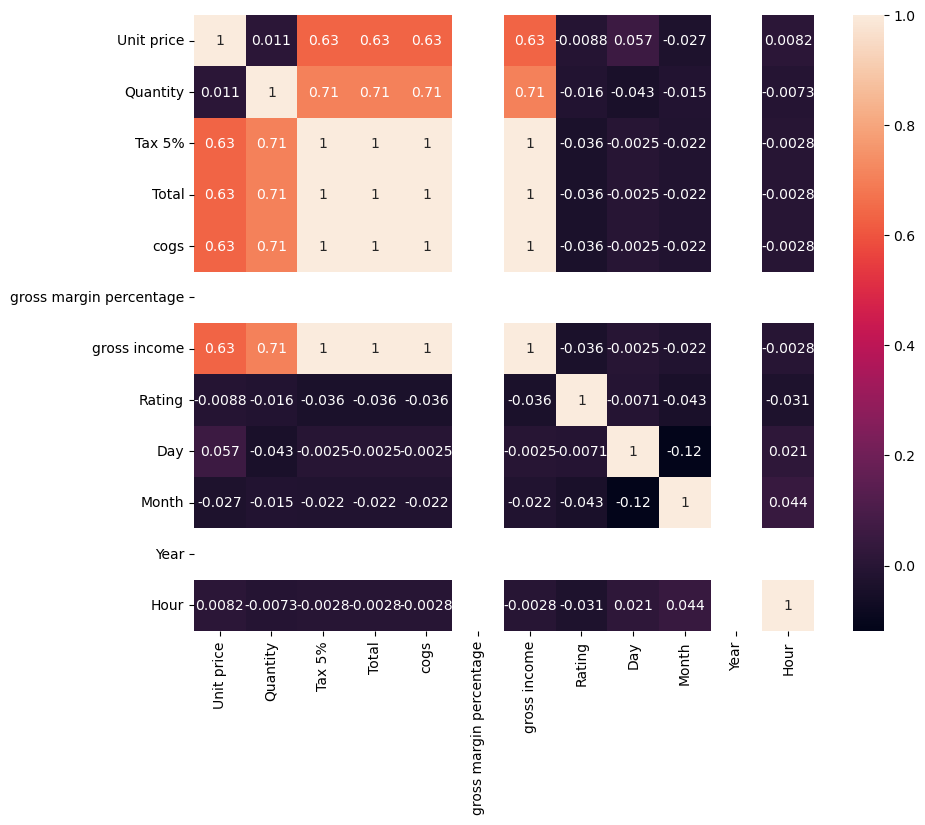

In [120]:
plt.figure(figsize=(10,8))
corr_df = mkt_sales.corr(numeric_only = True)
sns.heatmap(corr_df,annot=True)

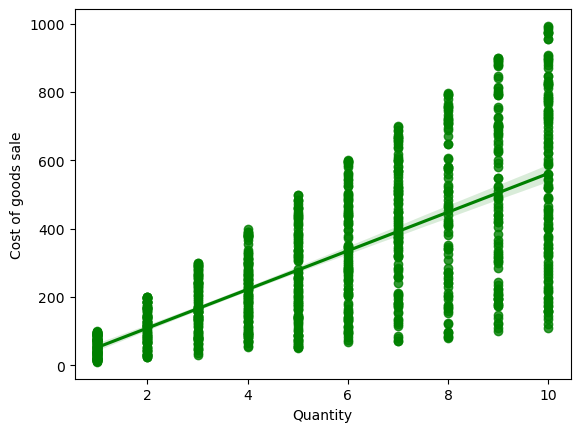

In [121]:
# To plot the relationship between the 'Quantity' and 'cogs' features using regression plot
sns.regplot(x = 'Quantity', y = 'cogs', data = mkt_sales, color = 'green')
plt.xlabel('Quantity')
plt.ylabel('Cost of goods sale')
plt.show()

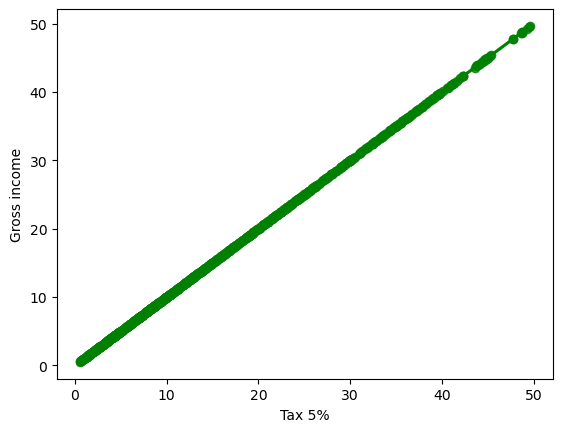

In [122]:
# To plot the relationship between the 'Tax 5%' and 'Gross Income' features using regression plot
sns.regplot(x = 'Tax 5%', y = 'gross income', data = mkt_sales, color = 'green')
plt.xlabel('Tax 5%')
plt.ylabel('Gross income')
plt.show()

In [123]:
# To get the mean rating of our data
np.mean(mkt_sales['Rating'])

6.9727

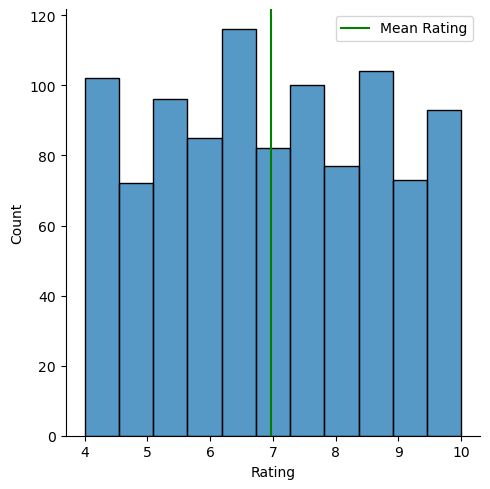

In [124]:
sns.displot(mkt_sales['Rating'])
plt.axvline(x = np.mean(mkt_sales['Rating']), c= 'green', label = 'Mean Rating')
plt.legend()

In [125]:
[col for col in mkt_sales.columns if mkt_sales[col].dtype == object]

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [126]:
cat_col = []
for col in mkt_sales.columns:
    if mkt_sales[col].dtype == 'object':
        cat_col.append(col)

In [127]:
cat_col

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [198]:
# we want to define a function to get the count plot of our data
import random
def countplot(column):
    selected_palette = random.choice(['viridis', 'magma', 'plasma', 'cividis', 'coolwarm'])
    return sns.countplot(x=column, hue=column, data=mkt_sales, palette=selected_palette, legend=False) 

In [191]:
def boxplot(x_column, y_column):
    selected_palette = random.choice(['viridis', 'magma', 'plasma', 'cividis', 'coolwarm'])
    return sns.boxplot(x = x_column, y = y_column, data = mkt_sales, palette=selected_palette, legend=False, hue = x_column)

In [135]:
# For the line plot
def lineplot(x_column, y_column):
    return sns.lineplot(x = x_column, y = y_column, data= mkt_sales)

In [141]:
# For relation plot
def rel_plot(x_col, y_col, col_name = None, row_name = None, rel_type = None, hue_name = None, style_name = None):
    return sns.relplot(x = x_col, y = y_col, col = col_name, row = row_name, kind = rel_type, hue = hue_name, style = style_name, data = mkt_sales)

<Axes: xlabel='Customer type', ylabel='count'>

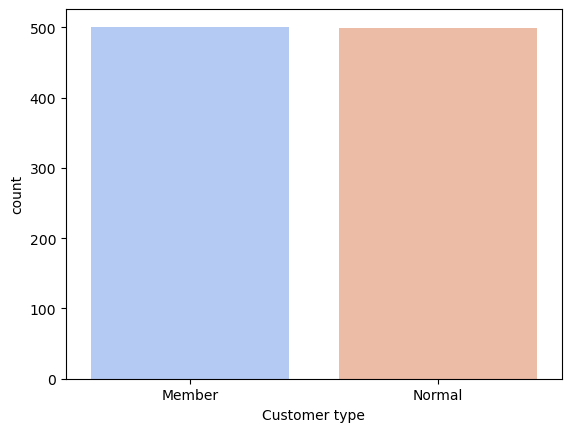

In [200]:
countplot('Customer type')

**Distribution of the mkt_sales data**

Whenever you want to visualize the distribution of your data, you have like 3 approaches:
- displot
- histogram
- boxplot

<Axes: xlabel='Branch', ylabel='Rating'>

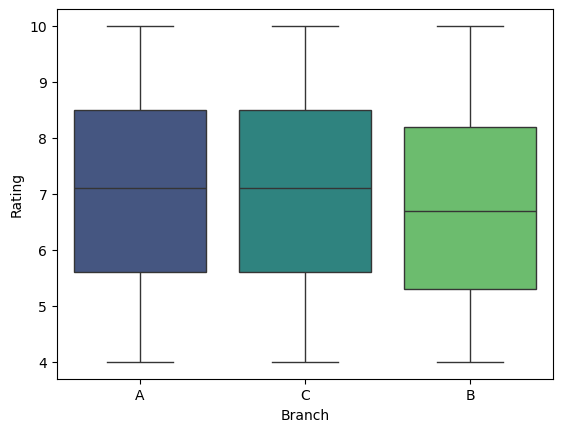

In [192]:
boxplot('Branch', 'Rating')

<Axes: xlabel='Quantity', ylabel='Hour'>

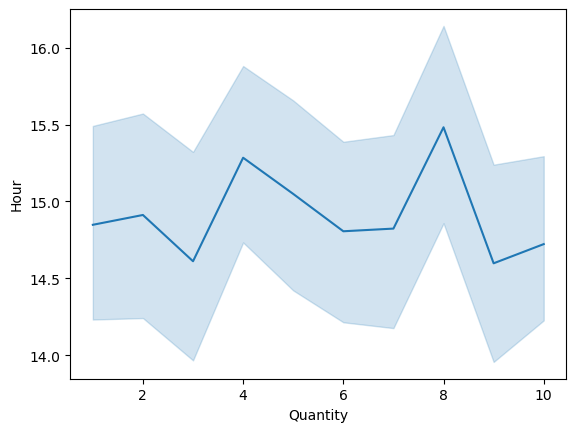

In [136]:
# Visualizing the number of sales per hour
lineplot('Quantity', 'Hour')

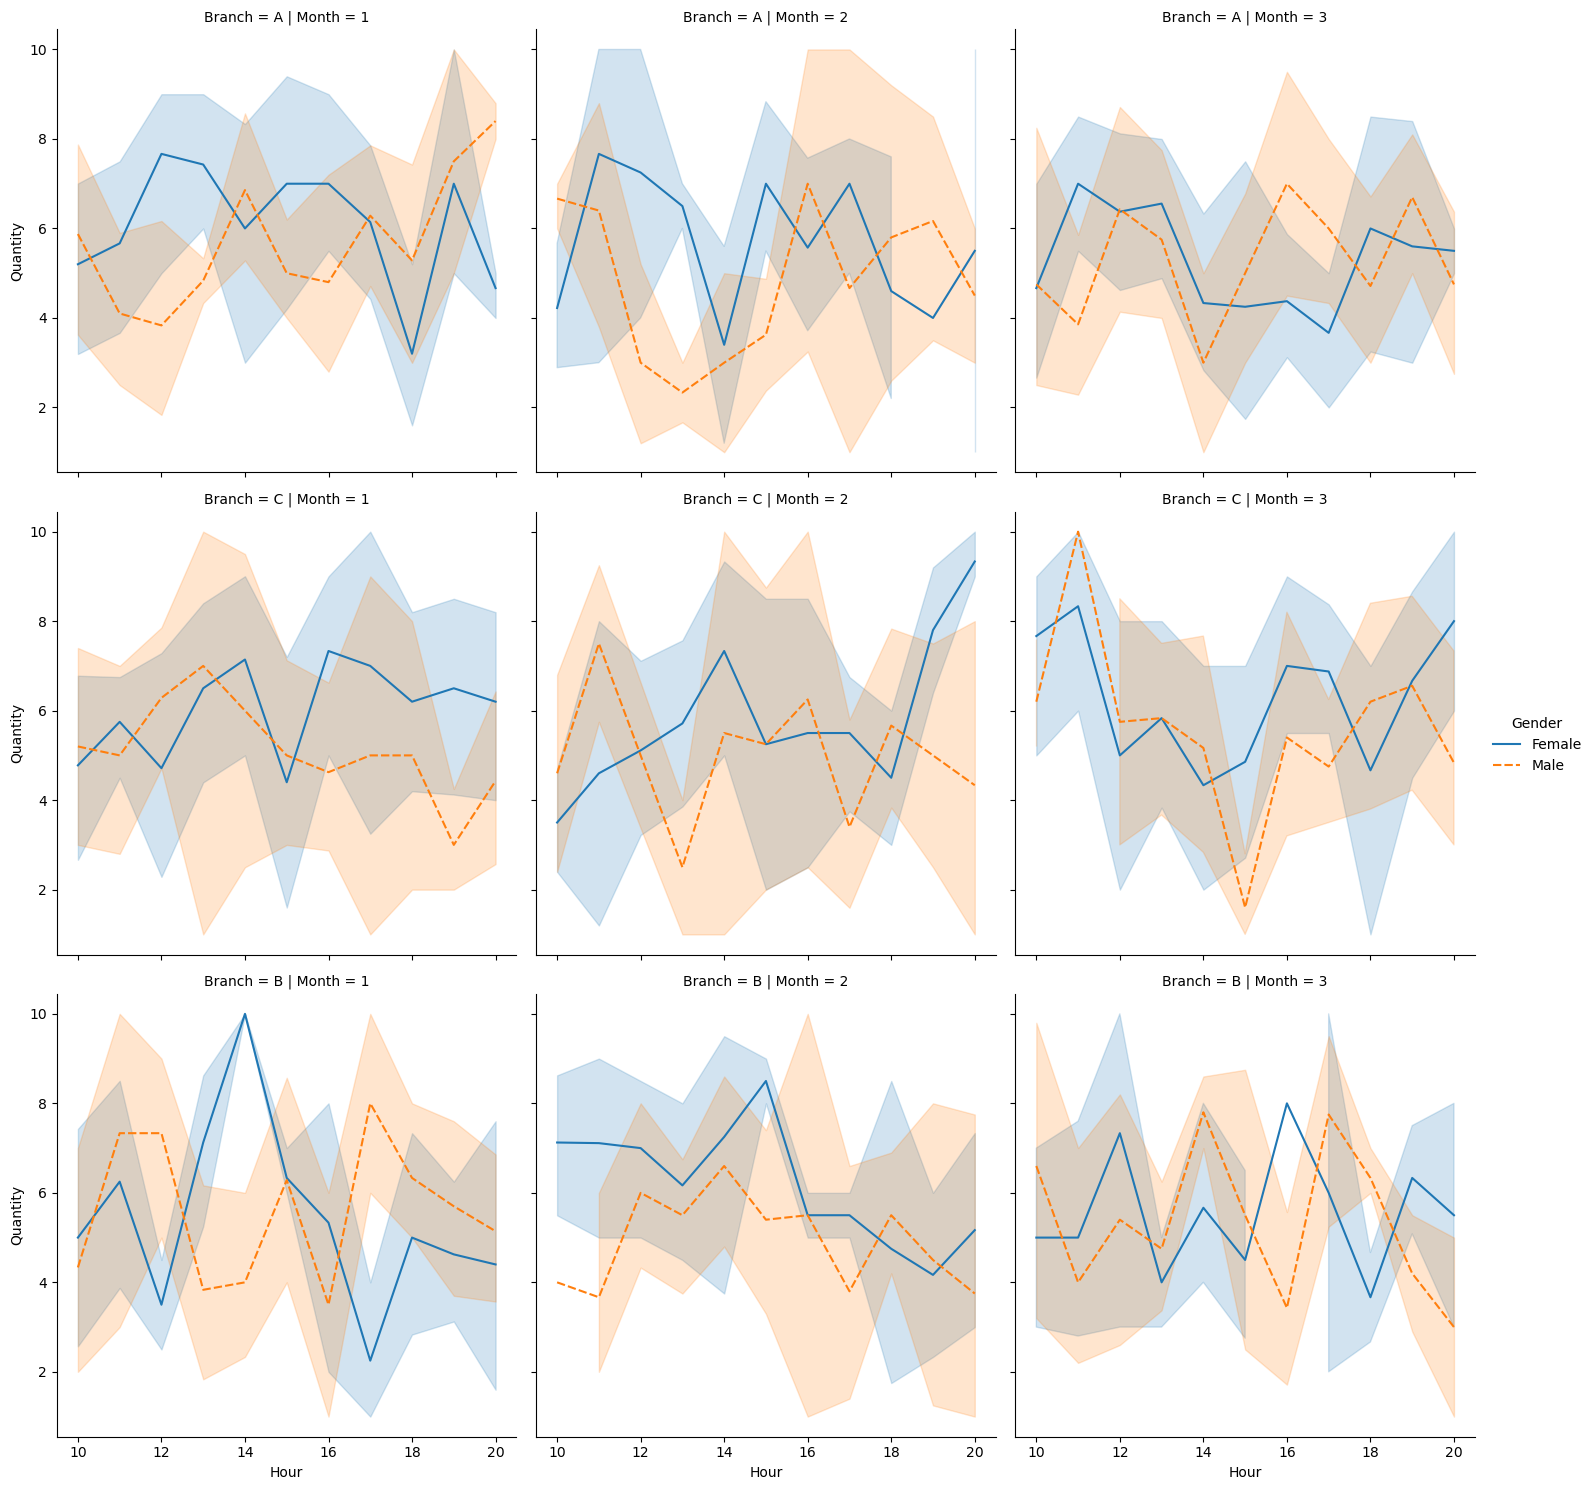

In [142]:
# how much sales occur in every branch each month
rel_plot(x_col = 'Hour', y_col = 'Quantity', col_name = 'Month', row_name = 'Branch', rel_type = 'line', hue_name = 'Gender', style_name = 'Gender')

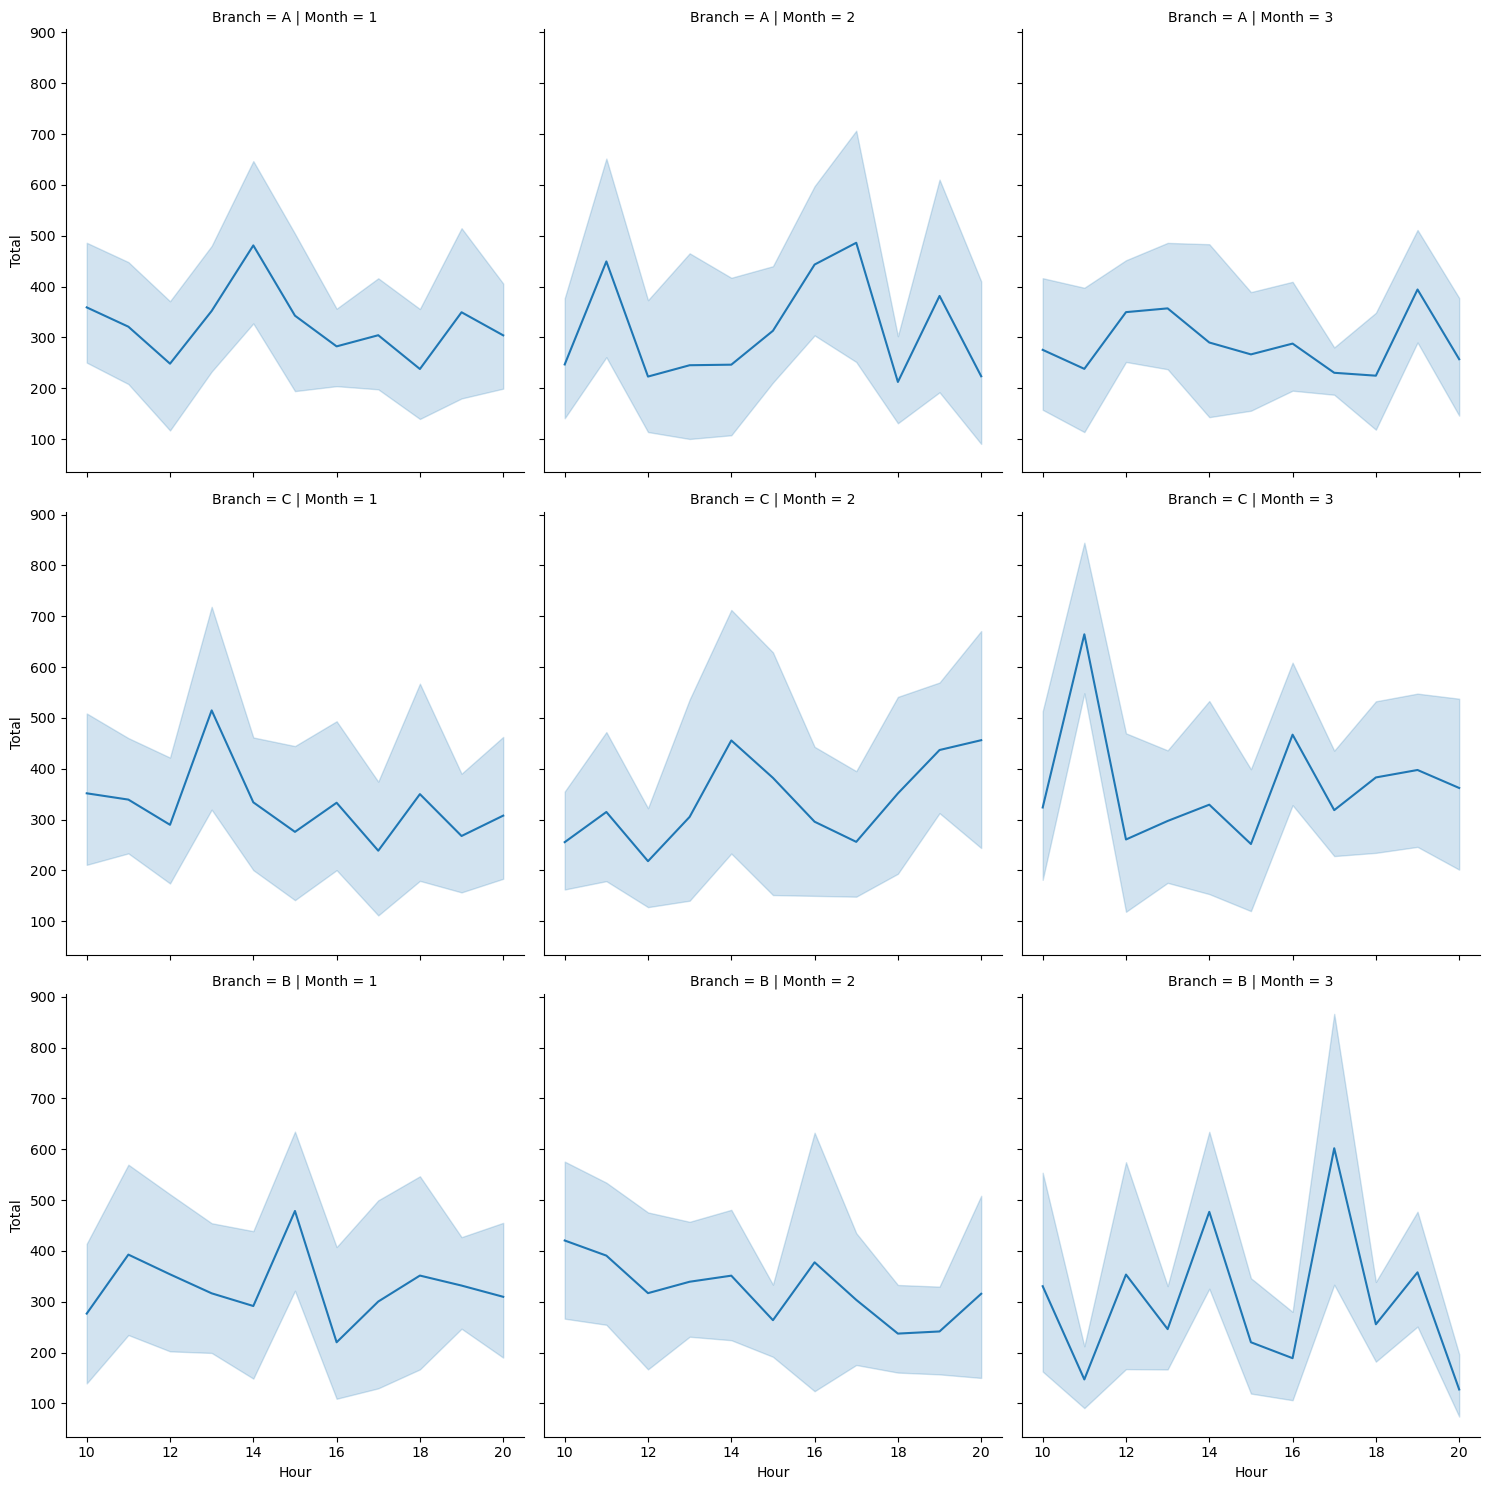

In [143]:
# how much sales occur in every branch per hour
rel_plot(x_col = 'Hour', y_col = 'Total', col_name = 'Month', row_name = 'Branch', rel_type = 'line')

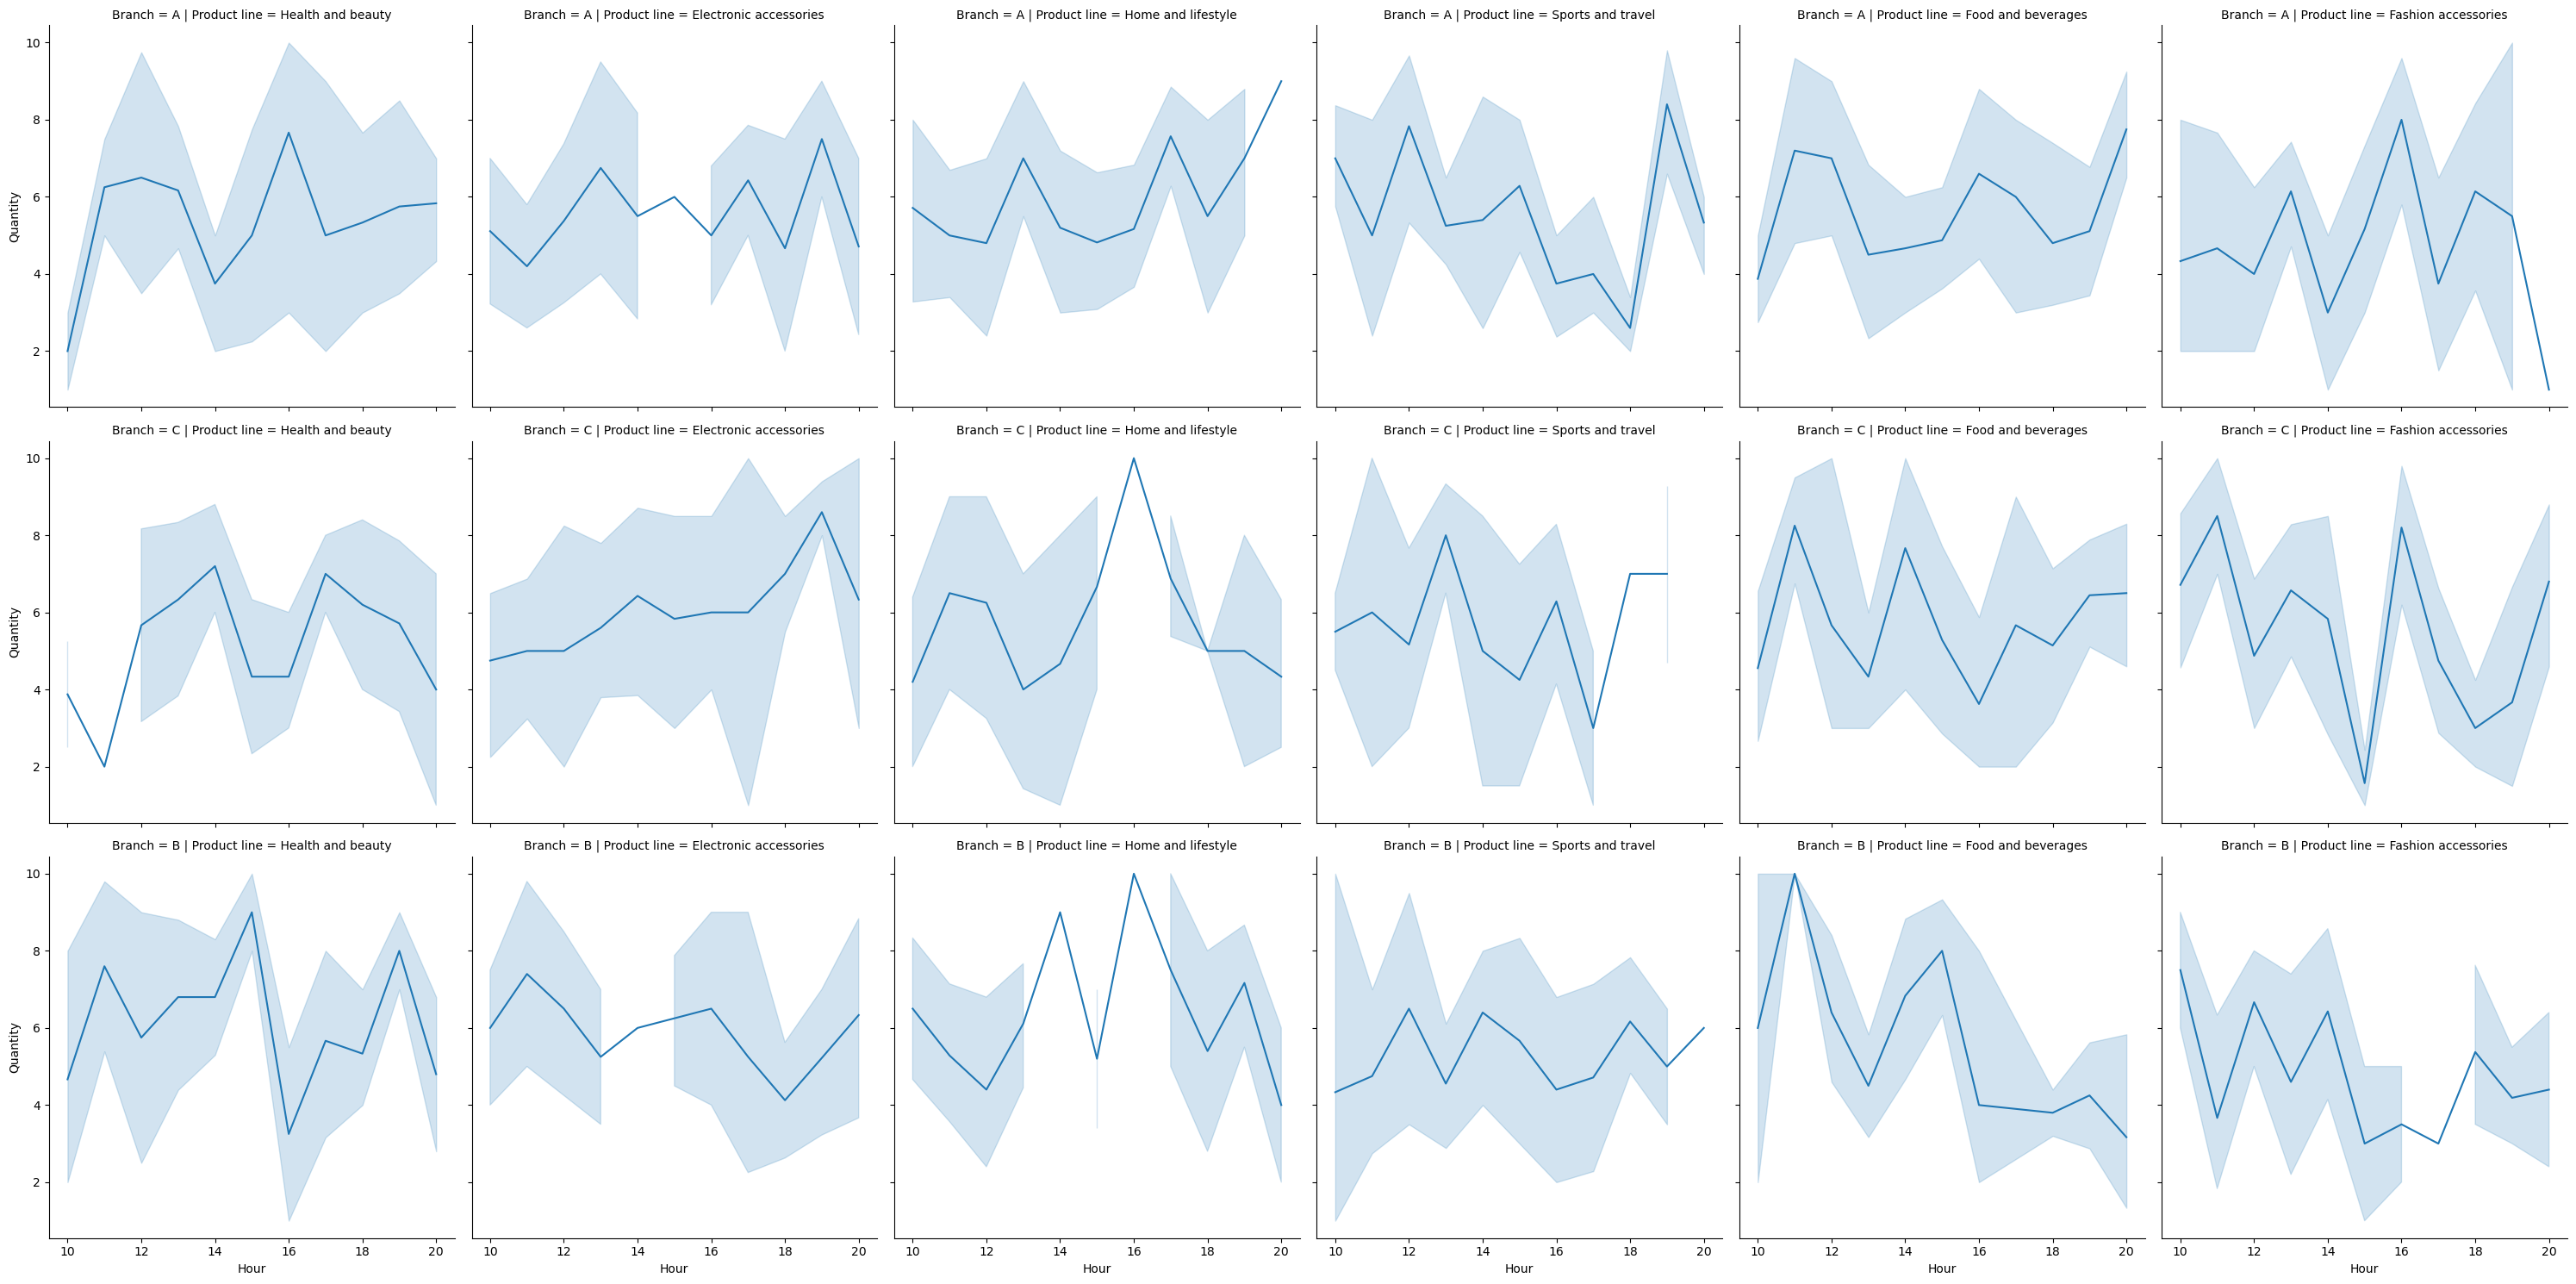

In [144]:
# when are customers likely to purchase certain goods
rel_plot(x_col = 'Hour', y_col = 'Quantity', col_name = 'Product line', row_name = 'Branch', rel_type = 'line')

<Axes: xlabel='Product line', ylabel='Quantity'>

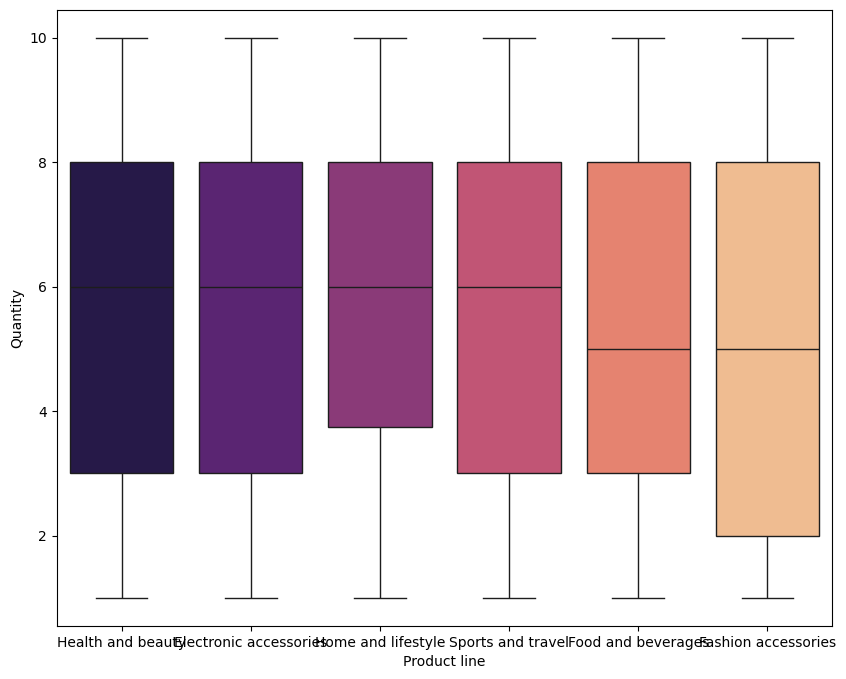

In [166]:
# Product analysis - quantity distribution of each product
plt.figure(figsize = (10, 8))
boxplot( 'Product line', 'Quantity')

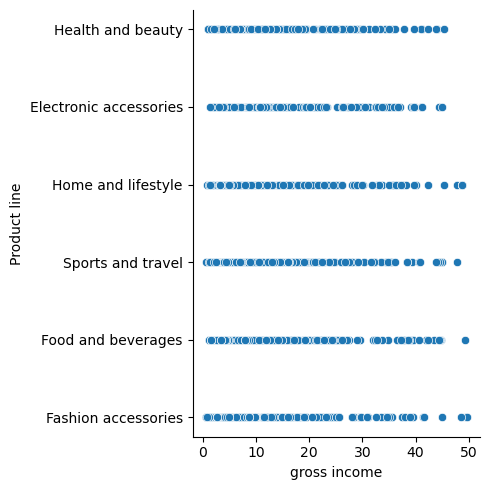

In [168]:
# Relationship between Gross income and product line
rel_plot('gross income', 'Product line', rel_type = 'scatter')

<Axes: xlabel='Payment', ylabel='count'>

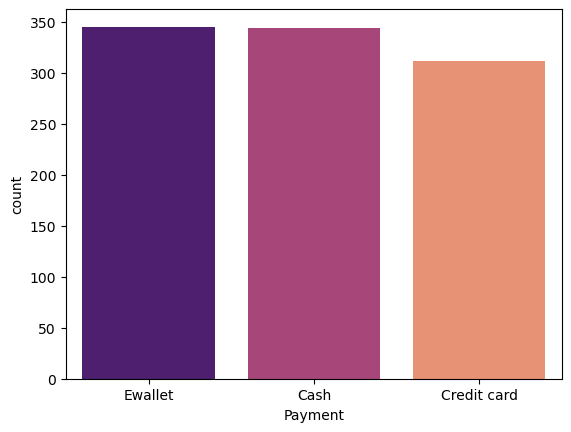

In [201]:
# customer's prefered payment method
countplot('Payment')

In [174]:
mkt_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

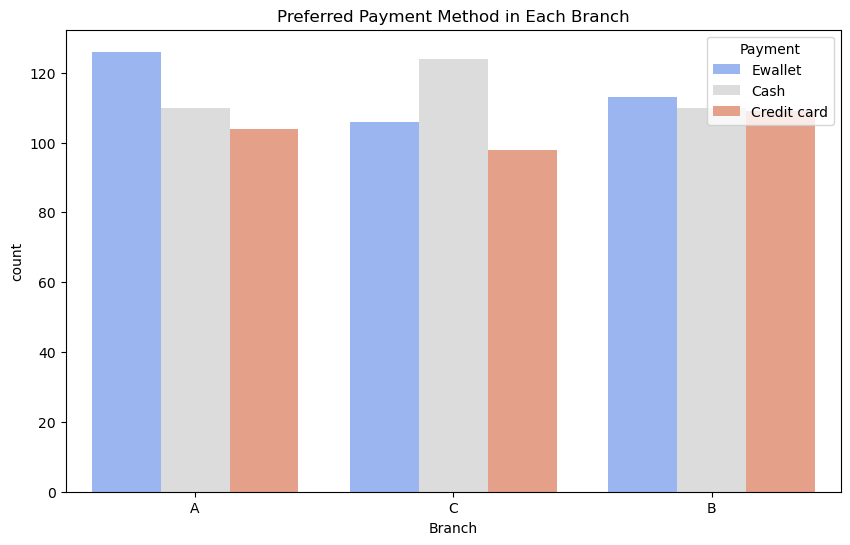

In [203]:
# Define the countplot function
def countplot(x_column, hue_column):
    selected_palette = random.choice(['viridis', 'magma', 'plasma', 'cividis', 'coolwarm'])
    plt.figure(figsize=(10, 6))
    return sns.countplot(x=x_column, hue=hue_column, data=mkt_sales, palette=selected_palette)

# Preferred payment method in different branches
countplot('Branch', 'Payment')
plt.title('Preferred Payment Method in Each Branch')
plt.show()

In [207]:
mkt_sales.groupby(['Customer type'])['Total'].sum()

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

Text(0.5, 1.0, 'Customer Type')

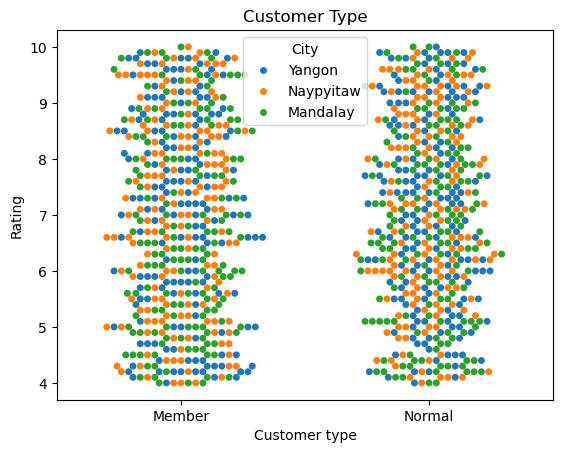

In [210]:
sns.swarmplot(x = 'Customer type', y = 'Rating', hue = 'City', data = mkt_sales).set_title('Customer Type')

In [216]:
from wordcloud import WordCloud

In [213]:
''.join(mkt_sales['Product line'])

'Health and beautyElectronic accessoriesHome and lifestyleHealth and beautySports and travelElectronic accessoriesElectronic accessoriesHome and lifestyleHealth and beautyFood and beveragesFashion accessoriesElectronic accessoriesElectronic accessoriesFood and beveragesHealth and beautySports and travelHealth and beautySports and travelFood and beveragesHome and lifestyleElectronic accessoriesHealth and beautyHome and lifestyleElectronic accessoriesSports and travelHome and lifestyleFashion accessoriesFashion accessoriesFood and beveragesHealth and beautyFashion accessoriesSports and travelSports and travelHealth and beautyFood and beveragesSports and travelSports and travelElectronic accessoriesHealth and beautyHome and lifestyleHome and lifestyleHome and lifestyleSports and travelFood and beveragesHealth and beautyElectronic accessoriesHealth and beautyFood and beveragesElectronic accessoriesFashion accessoriesFood and beveragesFood and beveragesFashion accessoriesFashion accessories

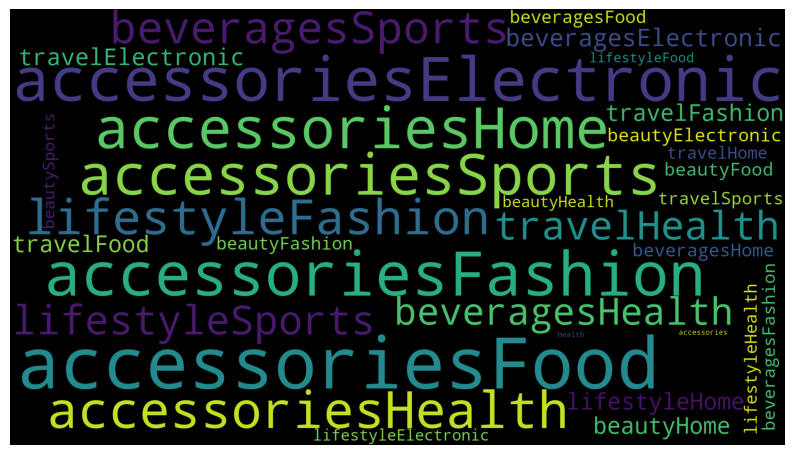

In [219]:
plt.figure(figsize = (10, 8))
wordcloud = WordCloud(width = 1920, height = 1080).generate(''.join(mkt_sales['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [245]:
X = mkt_sales.iloc[:,-8].values.reshape(-1,1)

In [246]:
X

array([[522.83],
       [ 76.4 ],
       [324.31],
       [465.76],
       [604.17],
       [597.73],
       [413.04],
       [735.6 ],
       [ 72.52],
       [164.52],
       [ 57.92],
       [102.04],
       [234.75],
       [431.9 ],
       [713.8 ],
       [562.32],
       [482.51],
       [435.66],
       [164.01],
       [ 80.6 ],
       [430.2 ],
       [263.94],
       [ 66.4 ],
       [172.8 ],
       [265.89],
       [420.72],
       [ 33.52],
       [175.34],
       [441.8 ],
       [224.01],
       [470.65],
       [702.63],
       [670.24],
       [193.16],
       [397.68],
       [ 68.12],
       [313.1 ],
       [547.92],
       [439.36],
       [240.96],
       [ 86.72],
       [112.22],
       [414.72],
       [789.6 ],
       [ 30.74],
       [375.84],
       [510.21],
       [180.09],
       [113.58],
       [826.3 ],
       [639.8 ],
       [222.95],
       [ 71.48],
       [ 15.43],
       [ 32.32],
       [687.84],
       [ 88.68],
       [716.8 ],
       [723.5 

In [226]:
from sklearn.cluster import KMeans

In [247]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [234]:
wcss

[54783799.0201356,
 14794351.065176785,
 6684217.387064208,
 3886534.507412911,
 2614228.8119408083,
 1771690.8015642364,
 1352643.8364068388,
 1184649.9424961733,
 831638.4335130798,
 691317.471741723]

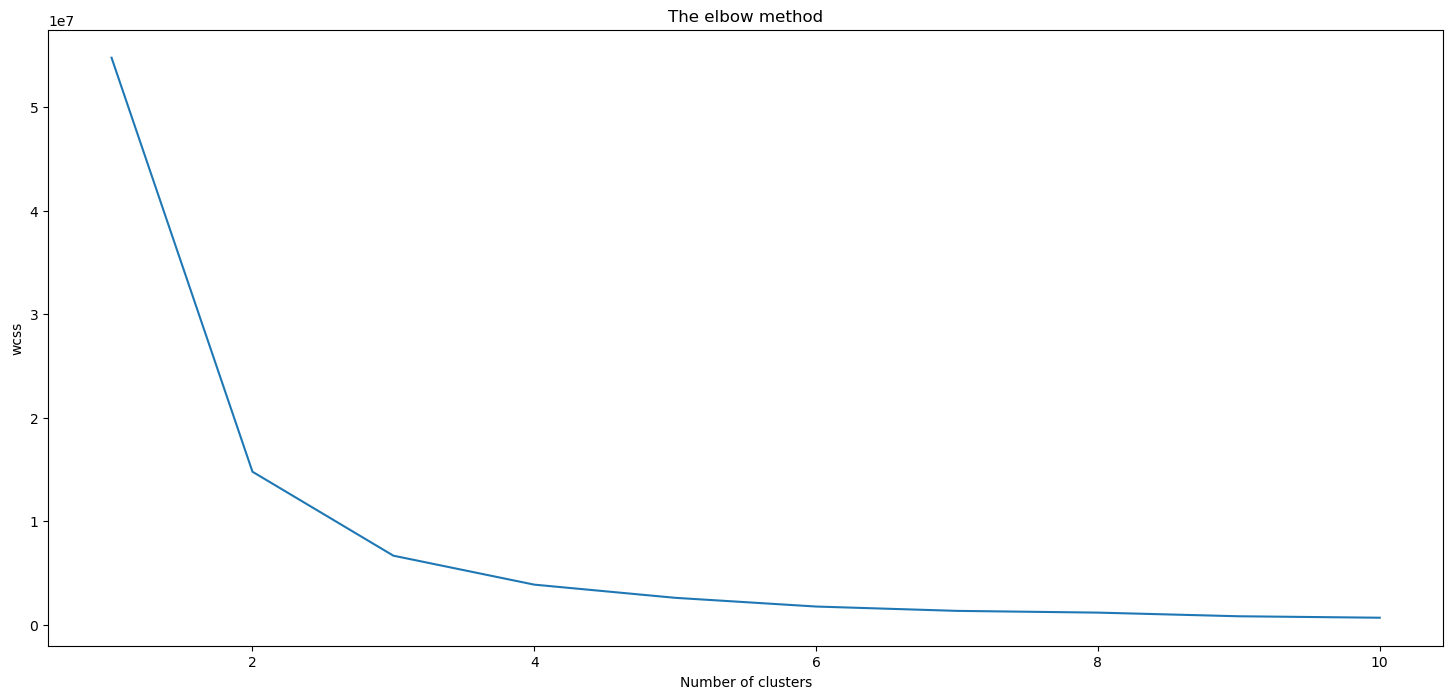

In [248]:
plt.figure(figsize = (18, 8))
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [249]:
kmeans = KMeans(n_clusters=5, random_state = 42)

In [251]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 2, 0, 0, 3, 3, 0, 1, 2, 4, 2, 2, 4, 0, 1, 3, 3, 0, 4, 2, 0, 4,
       2, 4, 4, 0, 2, 4, 0, 4, 0, 1, 3, 4, 0, 2, 0, 3, 0, 4, 2, 2, 0, 1,
       2, 0, 3, 4, 2, 1, 3, 4, 2, 2, 2, 1, 2, 1, 1, 4, 2, 0, 3, 4, 0, 4,
       2, 3, 1, 2, 1, 3, 2, 0, 3, 0, 0, 4, 1, 2, 3, 4, 4, 0, 4, 3, 0, 0,
       2, 0, 4, 0, 4, 3, 2, 2, 1, 2, 4, 3, 2, 1, 4, 0, 4, 1, 4, 0, 0, 1,
       2, 4, 3, 3, 1, 2, 2, 2, 2, 2, 1, 0, 1, 3, 0, 3, 4, 4, 3, 1, 4, 3,
       2, 3, 3, 4, 2, 4, 3, 3, 1, 1, 1, 2, 0, 4, 0, 4, 3, 4, 0, 4, 1, 2,
       3, 0, 2, 4, 1, 3, 0, 2, 0, 4, 0, 0, 1, 1, 0, 3, 0, 0, 4, 0, 4, 0,
       4, 4, 0, 4, 0, 0, 4, 4, 2, 2, 1, 4, 2, 4, 4, 2, 1, 2, 4, 2, 2, 2,
       4, 0, 2, 4, 0, 4, 2, 4, 3, 4, 2, 1, 4, 1, 0, 2, 4, 2, 2, 4, 1, 4,
       4, 0, 2, 2, 2, 4, 3, 2, 3, 3, 4, 2, 1, 4, 3, 4, 2, 4, 2, 2, 4, 2,
       4, 4, 1, 0, 4, 2, 0, 3, 0, 0, 2, 2, 0, 2, 2, 4, 2, 4, 3, 2, 4, 4,
       2, 1, 2, 1, 4, 0, 0, 2, 4, 2, 3, 0, 4, 0, 1, 0, 3, 2, 2, 3, 4, 0,
       2, 4, 0, 3, 0, 4, 2, 2, 4, 4, 2, 0, 4, 2, 4,